# PRICE PREDICTION  FOR DELHI CITY

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
df = pd.read_csv("MagicBricks.csv")
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


RESHAPING AND CLEANING THE DATASET

In [5]:
df.shape
Price_df = df.copy()
Price_df.insert(11, "PRICE", df["Price"],True)
Price_df.drop(columns = "Price", axis=1, inplace = True)
Price_df["Per_Sqft"] = Price_df["PRICE"] / Price_df["Area"]
Price_df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft,PRICE
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,Ready_to_move,New_Property,Builder_Floor,8125.000000,6500000
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,Ready_to_move,New_Property,Apartment,6666.666667,5000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,Ready_to_move,Resale,Apartment,16315.789474,15500000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,Ready_to_move,Resale,Builder_Floor,7000.000000,4200000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,Ready_to_move,New_Property,Builder_Floor,9538.461538,6200000


In [6]:
Price_df["Type"].value_counts()  # important function
Price_df["Bathroom"].replace(np.nan, 1, inplace = True)

In [7]:
Price_df = Price_df[["Area" , "BHK", "Locality", "Per_Sqft", "PRICE"]]
Price_df.head()

,Area,BHK,Locality,Per_Sqft,PRICE
0,800.0,3,Rohini Sector 25,8125.000000,6500000
1,750.0,2,"J R Designers Floors, Rohini Sector 24",6666.666667,5000000
2,950.0,2,"Citizen Apartment, Rohini Sector 13",16315.789474,15500000
3,600.0,2,Rohini Sector 24,7000.000000,4200000
4,650.0,2,Rohini Sector 24 carpet area 650 sqft status R...,9538.461538,6200000


In [8]:
Price_df["Locality"] = Price_df["Locality"].apply(lambda x: x.strip())
location_stats = Price_df.groupby("Locality")["Locality"].agg("count").sort_values(ascending=False)
# now we know Lajpat Nagar 34 has maximum times located
# i will convert locality which are less than 4 are considered as others

In [9]:
len(location_stats[location_stats < 4])
type(location_stats)

pandas.core.series.Series

In [10]:
location_stats_less_than_4 = location_stats[location_stats <= 4]
location_stats_less_than_4

Locality
Shivalik, Malviya Nagar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        4
Savitri Nagar Village, Sheikh Sarai                                                                                                                                           

In [11]:
Price_df["Locality"] = Price_df["Locality"].apply(lambda x : "others" if x in location_stats_less_than_4 else x)
len(Price_df["Locality"].unique())

63

In [12]:
Price_df["Per_Sqft"].describe()
Price_df.shape

(1259, 5)

## REMOVING OUTLIERS

as the standard deviation is 20420. so
we will remove the data which have value greater than +-1 std of the mean
to generalise the model.


In [13]:
def remove_outliers(df):
        m = df["Per_Sqft"].mean()
        sd = df["Per_Sqft"].std()
        new_df = df[((df["Per_Sqft"]) < (m+sd)) & ((df["Per_Sqft"]) > (m-sd))]
        return new_df
    
Price_df = remove_outliers(Price_df)
Price_df.head()

,Area,BHK,Locality,Per_Sqft,PRICE
0,800.0,3,others,8125.000000,6500000
1,750.0,2,"J R Designers Floors, Rohini Sector 24",6666.666667,5000000
2,950.0,2,others,16315.789474,15500000
3,600.0,2,Rohini Sector 24,7000.000000,4200000
4,650.0,2,others,9538.461538,6200000


In [14]:
Price_df.head()

,Area,BHK,Locality,Per_Sqft,PRICE
0,800.0,3,others,8125.000000,6500000
1,750.0,2,"J R Designers Floors, Rohini Sector 24",6666.666667,5000000
2,950.0,2,others,16315.789474,15500000
3,600.0,2,Rohini Sector 24,7000.000000,4200000
4,650.0,2,others,9538.461538,6200000


As Locality is in string we convert it into some values 

In [15]:
Price_df.reset_index(inplace = True)
Price_df.drop(columns = "index", axis=1, inplace = True)

In [16]:
new_df = pd.DataFrame()
zero_cl = [0 for x in range(Price_df.shape[0])]
new_df.insert(0, "dummy", zero_cl, True)
for key in Price_df["Locality"].unique():
        new_df[key] = 0

Price_df = Price_df.join(new_df)
Price_df.drop(columns = "dummy", axis = 1, inplace = True)

 WE WILL TRANSVERSE LOCALITY COLUMN AND MARK IT 1 IN THAT LOCATION COLUMN

In [17]:
Price_df

,Area,BHK,Locality,Per_Sqft,PRICE,others,"J R Designers Floors, Rohini Sector 24",Rohini Sector 24,Lajpat Nagar 2,Lajpat Nagar,...,"DLF Capital Greens, New Moti Nagar, Kirti Nagar","New Moti Nagar, Kirti Nagar",Sheikh Sarai Phase 1,"Panchsheel Vihar, Sheikh Sarai",Punjabi Bagh West,"Govindpuri Extension, Kalkaji",Kalkaji,Hauz Khas,"Hauz Khas Enclave, Hauz Khas",Chittaranjan Park
0,800.0,3,others,8125.000000,6500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,2,"J R Designers Floors, Rohini Sector 24",6666.666667,5000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,others,16315.789474,15500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,2,Rohini Sector 24,7000.000000,4200000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,others,9538.461538,6200000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,4118.0,4,Chittaranjan Park,13355.998057,55000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1220,1050.0,3,Chittaranjan Park,11904.761905,12500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1221,875.0,3,Chittaranjan Park,20000.000000,17500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1222,990.0,2,others,11616.161616,11500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
count = 0
for x in Price_df["Locality"]:
    Price_df.loc[count, x] = 1
    count+=1
Price_df.head()        

,Area,BHK,Locality,Per_Sqft,PRICE,others,"J R Designers Floors, Rohini Sector 24",Rohini Sector 24,Lajpat Nagar 2,Lajpat Nagar,...,"DLF Capital Greens, New Moti Nagar, Kirti Nagar","New Moti Nagar, Kirti Nagar",Sheikh Sarai Phase 1,"Panchsheel Vihar, Sheikh Sarai",Punjabi Bagh West,"Govindpuri Extension, Kalkaji",Kalkaji,Hauz Khas,"Hauz Khas Enclave, Hauz Khas",Chittaranjan Park
0,800.0,3,others,8125.000000,6500000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,2,"J R Designers Floors, Rohini Sector 24",6666.666667,5000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,others,16315.789474,15500000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,2,Rohini Sector 24,7000.000000,4200000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,others,9538.461538,6200000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
droped_localiy_col = Price_df.drop(columns = "Locality", axis=1, inplace = True)

Now the data set is ready for further training testing and visualization

c:\python 3.8\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


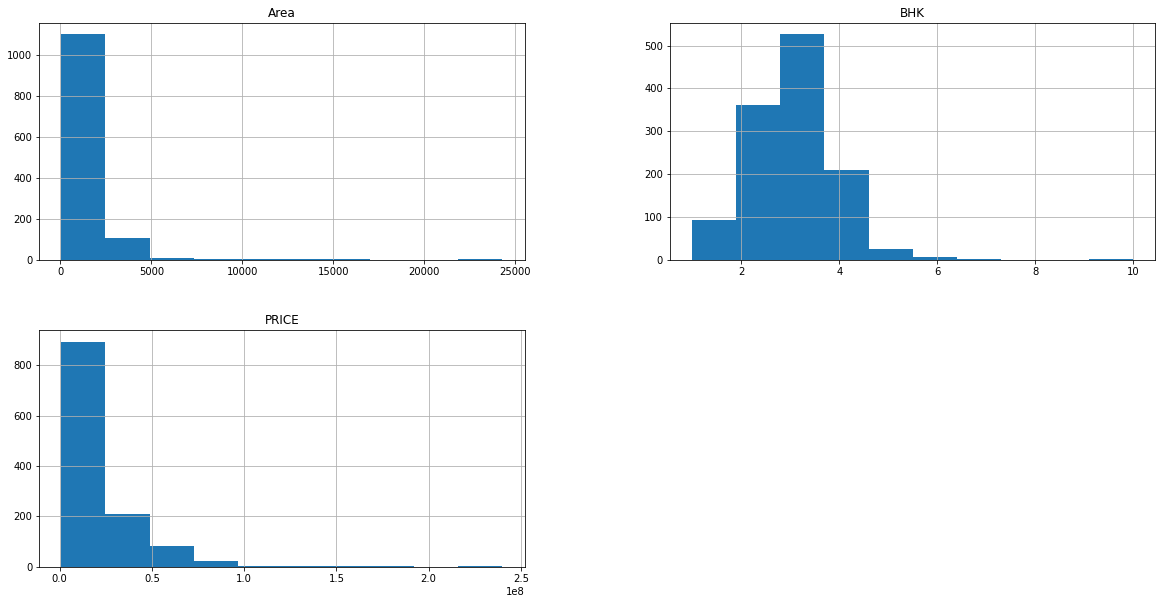

In [20]:
histo = Price_df[["Area", "BHK", "PRICE"]]
histo.hist()
plt.show()

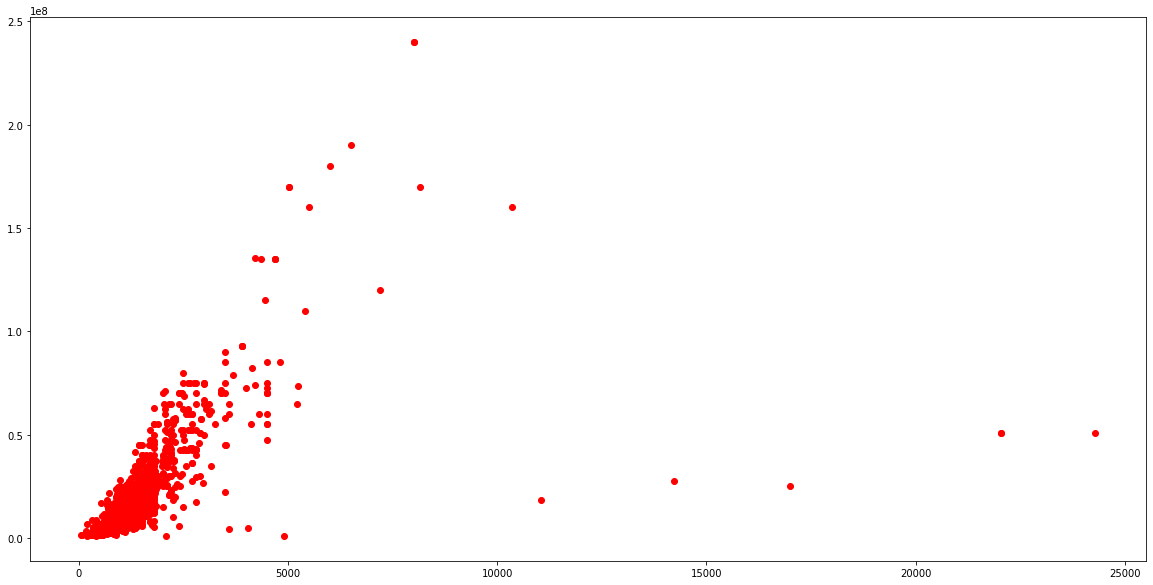

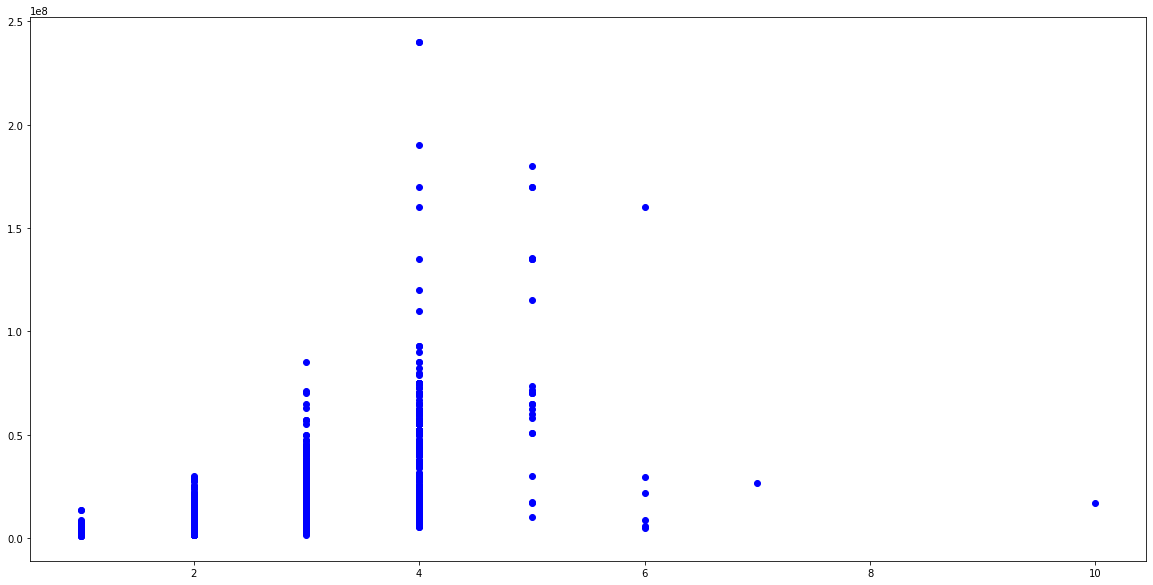

In [21]:
fig1, ax1 = plt.subplots(1)
fig2, ax2 = plt.subplots(1)

ax1.scatter(Price_df["Area"], Price_df["PRICE"], color="red")
ax2.scatter(Price_df["BHK"], Price_df["PRICE"], color = "blue")


## TRAIN TEST SPLITTING THE DATA

X is the features in this price data, Y is the label in price data and 20 % data used for testing and 80% for training

In [22]:
from sklearn.model_selection import train_test_split

X = Price_df.drop(columns = ["PRICE", "Per_Sqft"], axis = 1)
Y = Price_df["PRICE"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

we will be using linear regression for prediction

In [23]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print(f"linear regression accuracy : {accuracy}")

linear regression accuracy : 0.5497294965519863


checking accuracy for polynomial of degree 2

In [24]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(X_train)
clf2 = LinearRegression()
clf2.fit(train_x_poly, Y_train)

LinearRegression()

In [25]:
print("Coefficients : ",clf2.coef_)
print("Intercept : ", clf2.intercept_)


Coefficients :  [ 9.68859871e+00 -1.68358479e+04  1.01180702e+07 ...  2.06334960e+06
  0.00000000e+00 -5.68116956e+06]
Intercept :  4685838.33473818


In [26]:
poly_X_test = poly.fit_transform(X_test)
accuracy_is = clf2.score(poly_X_test, Y_test)
print(f"Quadratic regression accuracy : {accuracy_is}")

Quadratic regression accuracy : 0.8594822699021779


Hence we can see quadratic regression model is more accurate compare to linear regression

## PRIDICTING THE VALUES

In [27]:
Price_df.tail(10)

,Area,BHK,Per_Sqft,PRICE,others,"J R Designers Floors, Rohini Sector 24",Rohini Sector 24,Lajpat Nagar 2,Lajpat Nagar,"Vikram Vihar, Lajpat Nagar",...,"DLF Capital Greens, New Moti Nagar, Kirti Nagar","New Moti Nagar, Kirti Nagar",Sheikh Sarai Phase 1,"Panchsheel Vihar, Sheikh Sarai",Punjabi Bagh West,"Govindpuri Extension, Kalkaji",Kalkaji,Hauz Khas,"Hauz Khas Enclave, Hauz Khas",Chittaranjan Park
1214,1900.0,3,15000.000000,28500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1215,1800.0,3,16111.111111,29000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1216,1200.0,3,12916.666667,15500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1217,1800.0,3,14444.444444,26000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1218,1200.0,3,13750.000000,16500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1219,4118.0,4,13355.998057,55000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1220,1050.0,3,11904.761905,12500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1221,875.0,3,20000.000000,17500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1222,990.0,2,11616.161616,11500000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1223,11050.0,3,1674.208145,18500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### prediction is done using linear regression algorithm

In [28]:
def prediction_price_linear_reg(area, bhk, location):
    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bhk
    
    loc_index = np.where(X.columns == location)
    x[loc_index] = 1
    return clf.predict([x])[0]

linear_reg_predicted_price = prediction_price_linear_reg(1800, 3,"Greater Kailash")
print(f"Predicted Price by linear regression algorithm is {linear_reg_predicted_price}")

Predicted Price by linear regression algorithm is 25872870.349409312


### prediction is done using quadratic regression algorithm

In [29]:
def prediction_quad_reg(area, bhk, location):
    x = np.zeros((1, len(X.columns)))
    x[0][0] = area
    x[0][1] = bhk
    loc_index = np.where(X.columns == location)
    x[0][loc_index] = 1
    poly_x = poly.fit_transform(x)
    return np.abs(clf2.predict(poly_x))
    
pridicted_price = prediction_quad_reg(1800, 3, "Greater Kailash")
print(f"Predicted Price by quadratic regression Algorithm is {pridicted_price}")

Predicted Price by quadratic regression Algorithm is [23071876.49632022]


## saving our classifiers for further use using pickle library

In [30]:
import pickle
with open("Delhi_home_price_model_linear.pickle", "wb") as f:
    pickle.dump(clf, f)

In [32]:
with open("Delhi_home_price_model_quad.pickle", "wb") as f:
    pickle.dump(clf2, f)

In [34]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))